- 输入所需模块以及调用模式,并调整相关参数

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html',False)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',150)
pd.set_option('display.max_seq_items',None)

%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

- 创建对角为1的5*5矩阵，验证模块是否输入

In [2]:
def warmUpExercise():
    return (np.identity(5))

warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

- 传入数据，设定相关参数

In [3]:
data = np.loadtxt('linear_regression_data1.txt', delimiter=(','))   # 传入txt，目标以，分隔

X = np.c_[np.ones(data.shape[0]),data[:,0]]                # np.c_按colunm来组合array,np.ones确定常数系数
y = np.c_[data[:,1]]

Text(0,0.5,'Profit in $10,000s')

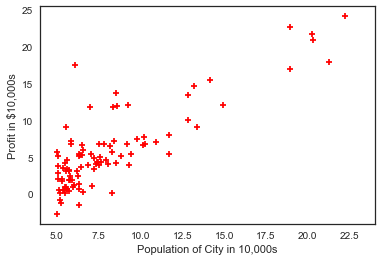

In [4]:
plt.scatter(X[:,1],y,s=30,c='r',marker='+',linewidths=1)        #绘制散点图
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

- 设定梯度下降函数

In [5]:
# 定义损失函数
def computeCost(X,y,theta=[[0],[0]]):
    m = y.size                              # y.size是指y的值的个数
    J = 0
    
    h = X.dot(theta)
    
    J = 1.0/(2*m)*(np.sum(np.square(h-y)))
    return J

computeCost(X,y)

32.072733877455676

- 设定梯度下降函数

In [33]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.0115, num_iters=1500):
    m = y.size                            
    J_history = np.zeros(num_iters)               # 设定J_history为num_iters个数的一维0值数组
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1.0/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return (theta, J_history)

- 画出迭代和损失函数变化曲线

theta:  [-3.71894828  1.17526889]
Cost_J 趋近:  4.479818157490867


Text(0.5,0,'Iterations')

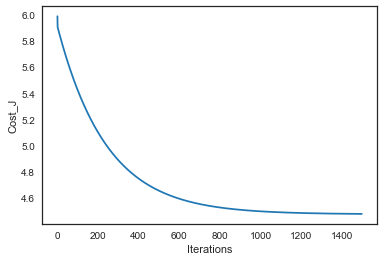

In [44]:
theta , Cost_J = gradientDescent(X,y)
print('theta: ', theta.ravel())  # 
print('Cost_J 趋近: ',Cost_J[-1])
plt.plot(Cost_J)
plt.ylabel('Cost_J')
plt.xlabel('Iterations')

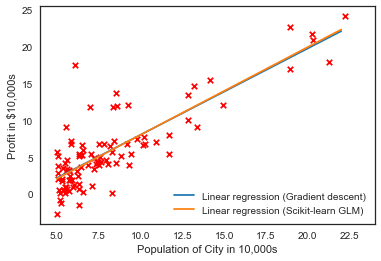

In [35]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

# 画出我们自己写的线性回归梯度下降收敛的情况
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')


# 和Scikit-learn中的线性回归对比一下 
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [36]:
# 预测一下人口为35000和70000的城市的结果
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[3944.92843393]
[45079.33962576]
